# **Food/Fruit Recognition and Calorie Estimation**
## **Part B Food recognition**

## **Installations**

In [1]:
!pip install open_clip_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━

In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✓ GPU Memory Growth Enabled")
    except RuntimeError as e:
        print(e)

2025-12-18 12:14:16.161905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766060056.343979      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766060056.394593      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

✓ GPU Memory Growth Enabled


## **Importing Libraries**

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, metrics
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import random
import torchvision.transforms as T
from tensorflow.keras.applications import ConvNeXtTiny

## **Loading Data**

In [4]:
train_dir = "/kaggle/input/cv-project-dataset/Project Data/Project Data/Food/Train"
val_dir = "/kaggle/input/cv-project-dataset/Project Data/Project Data/Food/Validation"
IMG_SIZE = (300, 300)

def load_image_paths(root_dir):
    classes = os.listdir(root_dir)
    class_to_imgs = {}
    for cls in classes:
        cls_path = os.path.join(root_dir, cls)
        images = glob(os.path.join(cls_path, "*.jpg")) + glob(os.path.join(cls_path, "*.png"))
        class_to_imgs[cls] = images
    return class_to_imgs

train_classes = load_image_paths(train_dir)
val_classes = load_image_paths(val_dir)

print("Train classes:", list(train_classes.keys()))
print("Validation classes:", list(val_classes.keys()))
print(f"Number of training classes: {len(train_classes)}")
print(f"Number of validation classes: {len(val_classes)}")

Train classes: ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 'baklava', 'hummus', 'chicken_wings', 'greek_salad', 'tuna_tartare', 'chocolate_cake', 'gyoza', 'deviled_eggs', 

## **1) Siamese Network**

### **Data Augmentation**

In [5]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2, fill_mode='nearest'),
    
    layers.RandomFlip("horizontal"),
    
    layers.RandomZoom(0.2, fill_mode='nearest'),
    
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode='nearest'),

    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.1)
])

I0000 00:00:1766060114.006915      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766060114.007647      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


### **Image Preprocessing**

In [6]:
def preprocess_image(path):
    """Load and preprocess image for Siamese network"""
    img = load_img(path, target_size=IMG_SIZE)
    img = img_to_array(img) 
    return img

def read_image(class_name, img_path):
    """Read image given class name and image path"""
    image = load_img(img_path, target_size=IMG_SIZE)
    image = img_to_array(image)
    return image


### **Triplet Creation**

In [ ]:
def create_triplets(folder_list, max_files=10):
    """Create triplets (anchor, positive, negative) from food classes"""
    triplets = []
    classes = list(folder_list.keys())
    
    for cls in classes:
        images = folder_list[cls][:max_files]  # Limit images per class
        num_images = len(images)
        
        # Create pairs within the same class
        for i in range(num_images - 1):
            for j in range(i + 1, num_images):
                anchor = (cls, images[i])
                positive = (cls, images[j])
                
                # Select negative from different class
                neg_class = cls
                while neg_class == cls:
                    neg_class = random.choice(classes)
                
                neg_images = folder_list[neg_class]
                neg_img = random.choice(neg_images)
                negative = (neg_class, neg_img)
                
                triplets.append((anchor, positive, negative))
    
    random.shuffle(triplets)
    return triplets


train_triplet = create_triplets(train_classes)
val_triplet = create_triplets(val_classes)

print("Number of training triplets:", len(train_triplet))
print("Number of validation triplets:", len(val_triplet))
print("\nExamples of triplets:")
for i in range(3):
    print(f"Anchor: {train_triplet[i][0][0]}, Positive: {train_triplet[i][1][0]}, Negative: {train_triplet[i][2][0]}")

Number of training triplets: 3825
Number of validation triplets: 360

Examples of triplets:
Anchor: peking_duck, Positive: peking_duck, Negative: oysters
Anchor: baklava, Positive: baklava, Negative: seaweed_salad
Anchor: waffles, Positive: waffles, Negative: ravioli


### **Batch Generator**

In [9]:
def get_batch(triplet_list, batch_size=256, preprocess=True, train=False):

    batch_steps = len(triplet_list) // batch_size
    
    for i in range(batch_steps + 1):
        anchor = []
        positive = []
        negative = []
        
        j = i * batch_size
        while j < (i + 1) * batch_size and j < len(triplet_list):
            a, p, n = triplet_list[j]
            anchor.append(read_image(a[0], a[1]))
            positive.append(read_image(p[0], p[1]))
            negative.append(read_image(n[0], n[1]))
            j += 1
        
        if len(anchor) == 0:
            continue
            
        # Convert to numpy arrays
        anchor = np.array(anchor)
        positive = np.array(positive)
        negative = np.array(negative)
        
        #         # Apply Augmentation if in training mode
        if train:
            anchor = data_augmentation(anchor)
            positive = data_augmentation(positive)
            negative = data_augmentation(negative)
        
        # Apply Xception preprocessing (expects values in range [-1, 1])
        # if preprocess:
        #     anchor = preprocess_input(anchor)
        #     positive = preprocess_input(positive)
        #     negative = preprocess_input(negative)
        
        yield ([anchor, positive, negative])

### **Visualize Triplets**

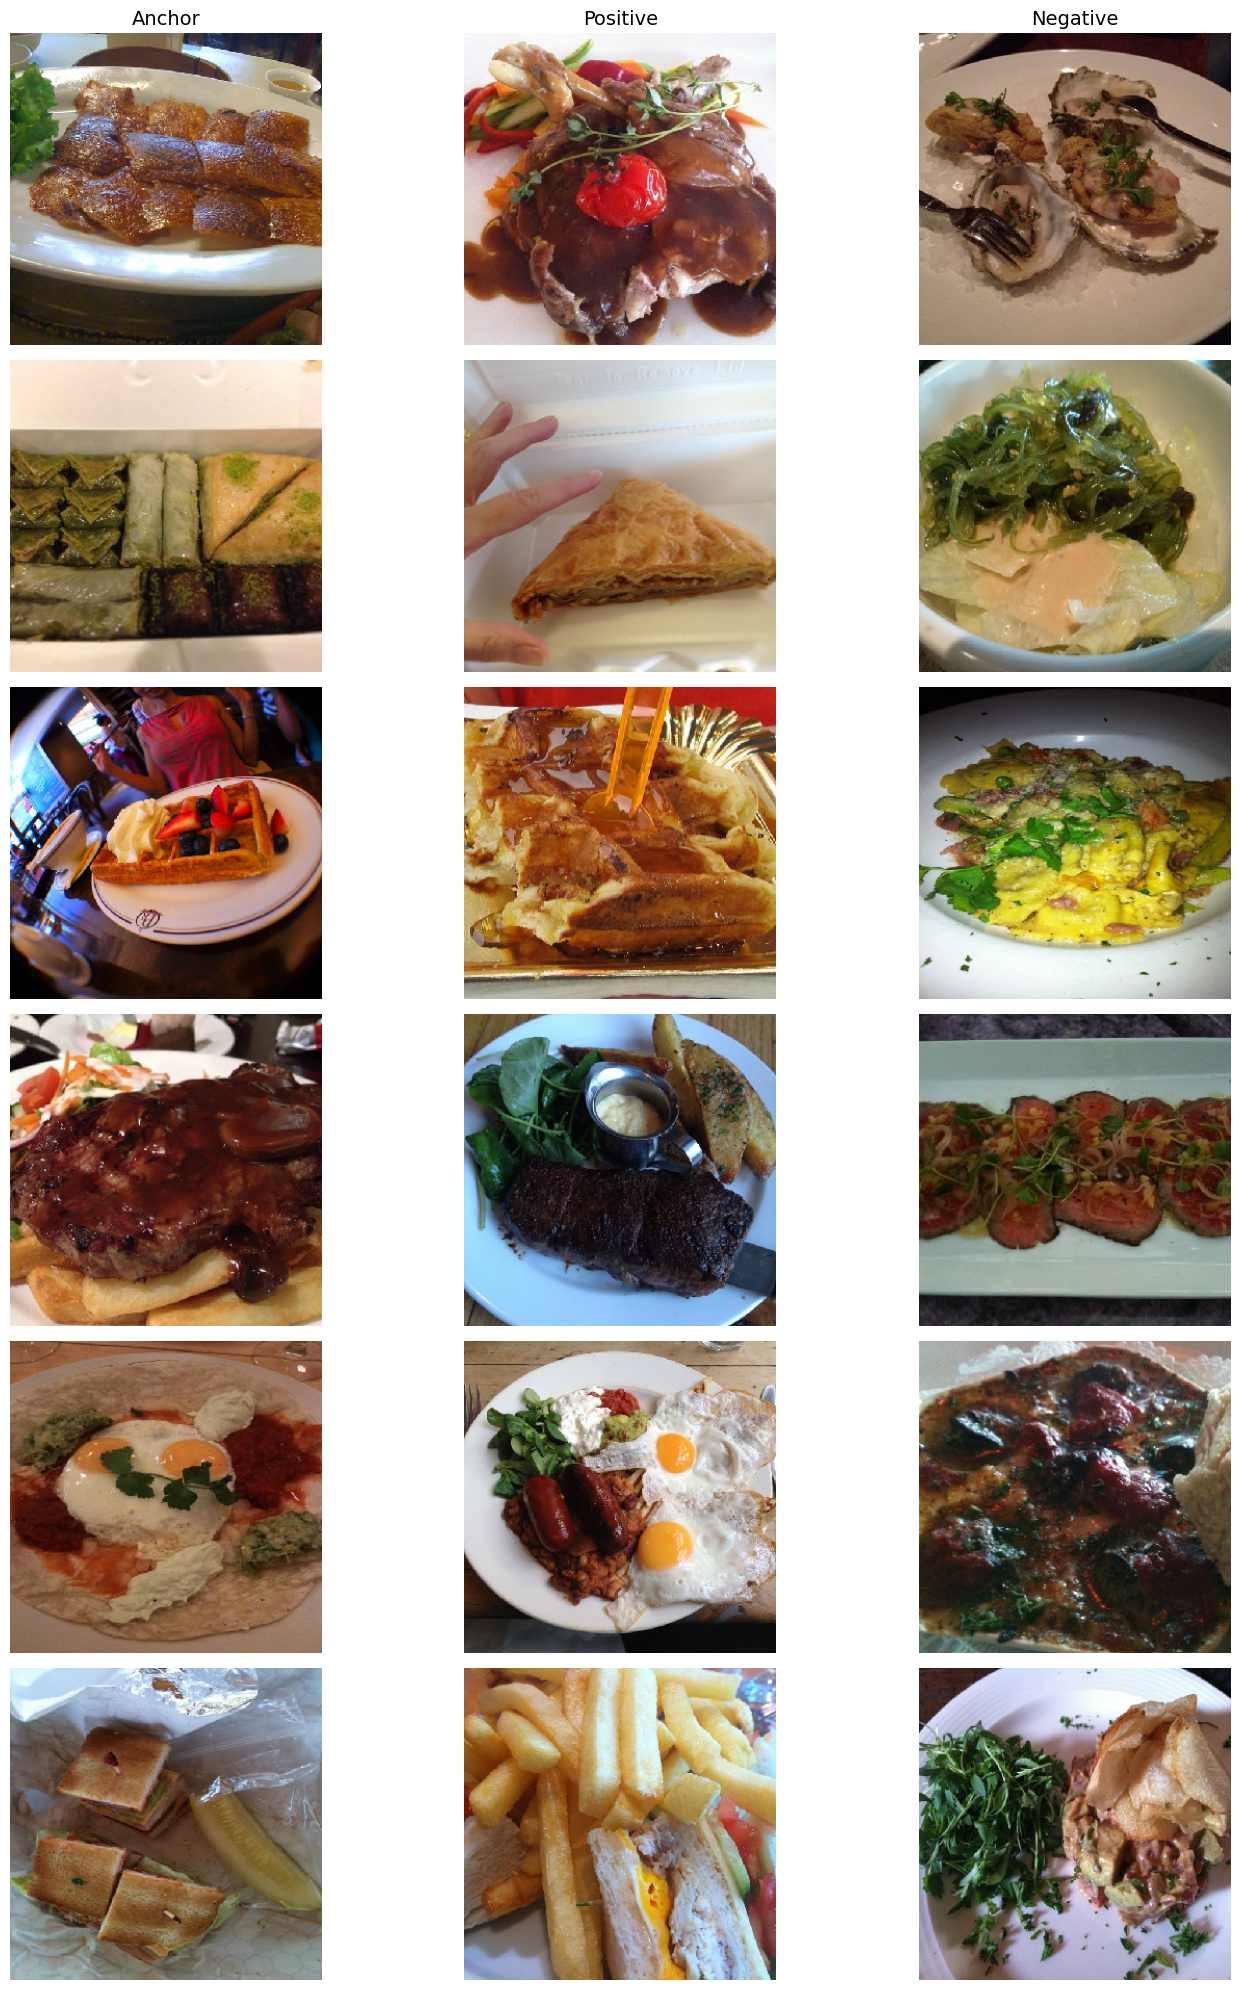

In [10]:
num_plots = 6
f, axes = plt.subplots(num_plots, 3, figsize=(15, 20))
axes[0, 0].set_title("Anchor", fontsize=14)
axes[0, 1].set_title("Positive", fontsize=14)
axes[0, 2].set_title("Negative", fontsize=14)

for x in get_batch(train_triplet, batch_size=num_plots, preprocess=False):
    a, p, n = x
    for i in range(min(num_plots, len(a))):
        axes[i, 0].imshow(a[i].astype('uint8'))
        axes[i, 1].imshow(p[i].astype('uint8'))
        axes[i, 2].imshow(n[i].astype('uint8'))
        axes[i, 0].axis('off')
        axes[i, 1].axis('off')
        axes[i, 2].axis('off')
    break
plt.tight_layout()
plt.show()

### **Encoder Model**

### **Xception**

In [23]:
from tensorflow.keras.layers import UnitNormalization

def get_encoder(input_shape):
    """Returns the image encoding model"""
    pretrained_model = Xception(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg',
    )
    
    for i in range(len(pretrained_model.layers) - 27): 
        pretrained_model.layers[i].trainable = False
    
    encode_model = Sequential([
        pretrained_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        UnitNormalization()
    ], name="Encode_Model")
    
    return encode_model

### **ConvNeXt**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import ConvNeXtTiny

@tf.keras.utils.register_keras_serializable()
class UnitNormalization(layers.Layer):
    """Normalized embeddings to a unit hypersphere."""
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        return tf.math.l2_normalize(inputs, axis=-1)

@tf.keras.utils.register_keras_serializable()
class LayerScale(layers.Layer):
    """Internal ConvNeXt layer required for loading."""
    # We add **kwargs to catch 'name', 'trainable', etc., from the .h5 file
    def __init__(self, init_values=None, projection_dim=None, **kwargs):
        super().__init__(**kwargs)
        self.init_values = init_values
        self.projection_dim = projection_dim

    def build(self, input_shape):
        self.gamma = self.add_weight(
            name="gamma",
            shape=(self.projection_dim,),
            initializer=tf.keras.initializers.Constant(self.init_values),
            trainable=True,
        )

    def call(self, x):
        return x * self.gamma

    def get_config(self):
        config = super().get_config()
        config.update({
            "init_values": self.init_values,
            "projection_dim": self.projection_dim,
        })
        return config
def get_convnext_encoder(input_shape):
    """Modernized ConvNet encoder for Image-to-Image tasks"""
    
    base_model = ConvNeXtTiny(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg' 
    )
    
    base_model.trainable = True
    for layer in base_model.layers[:-20]:
        layer.trainable = False
        
    encode_model = Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        UnitNormalization() 
    ], name="ConvNeXt_Encoder")
    
    return encode_model

### **EfficientNetV2**

In [11]:
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.layers import UnitNormalization

def get_efficientnet_encoder(input_shape=(300, 300, 3)):
    base_model = EfficientNetV2S(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg'
    )
    
    # Freeze early stages
    base_model.trainable = True
    for layer in base_model.layers[:-30]:
        layer.trainable = False

    model = tf.keras.Sequential([
        base_model,
        UnitNormalization()
    ], name="EfficientNet_Encoder")
    
    return model

### **Distance Layer**

In [12]:
from tensorflow.keras import layers, Model
class DistanceLayer(layers.Layer):
    """
    Computes the distance between Anchor-Positive and Anchor-Negative.
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)

### **Siamese Network**

### **Xception**

In [ ]:
def get_siamese_network(input_shape=(300, 300, 3)):
 
    encoder = get_encoder(input_shape)
    
    anchor_input = layers.Input(input_shape, name="Anchor_Input")
    positive_input = layers.Input(input_shape, name="Positive_Input")
    negative_input = layers.Input(input_shape, name="Negative_Input")
    
    encoded_a = encoder(anchor_input)
    encoded_p = encoder(positive_input)
    encoded_n = encoder(negative_input)
    
    distances = DistanceLayer()(encoded_a, encoded_p, encoded_n)
    
    return Model(
        inputs=[anchor_input, positive_input, negative_input], 
        outputs=distances, 
        name="Siamese_Network"
    )

print("Building Siamese Network...")
siamese_network = get_siamese_network()
siamese_network.summary()

Building Siamese Network...
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "Siamese_Network"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Anchor_Input        │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Positive_Input      │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Negative_Input      │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Encode_Model        │ (None, 256)       │ 22,043,944 │ Anchor_Input[0][… │
│ (Sequential)        │                   │            │ Positive_Input[0… │
│                     │                   │            │ Negative_Input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distance_layer_1    │ [(None), (None)]  │          0 │ Encode_Model[0][… │
│ (DistanceLayer)     │                   │            │ Encode_Model[1][… │
│                     │                   │            │ Encode_Model[2][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,043,944 (84.09 MB)

 Trainable params: 9,583,800 (36.56 MB)

 Non-trainable params: 12,460,144 (47.53 MB)

### **ConvNeXt**

In [16]:
def get_siamese_network_ConvNeXt(input_shape=(300, 300, 3)):

    encoder = get_convnext_encoder(input_shape)
    

    anchor_input = layers.Input(input_shape, name="Anchor_Input")
    positive_input = layers.Input(input_shape, name="Positive_Input")
    negative_input = layers.Input(input_shape, name="Negative_Input")
    
    encoded_a = encoder(anchor_input)
    encoded_p = encoder(positive_input)
    encoded_n = encoder(negative_input)
    
    distances = DistanceLayer()(encoded_a, encoded_p, encoded_n)
    
    return Model(
        inputs=[anchor_input, positive_input, negative_input], 
        outputs=distances, 
        name="Siamese_Network"
    )

print("Building Siamese Network...")
siamese_network_ConvNeXt = get_siamese_network_ConvNeXt()
siamese_network_ConvNeXt.summary()

Building Siamese Network...
111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "Siamese_Network"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Anchor_Input        │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Positive_Input      │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Negative_Input      │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ConvNeXt_Encoder    │ (None, 256)       │ 28,347,232 │ Anchor_Input[0][… │
│ (Sequential)        │                   │            │ Positive_Input[0… │
│                     │                   │            │ Negative_Input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distance_layer_1    │ [(None), (None)]  │          0 │ ConvNeXt_Encoder… │
│ (DistanceLayer)     │                   │            │ ConvNeXt_Encoder… │
│                     │                   │            │ ConvNeXt_Encoder… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,347,232 (108.14 MB)

 Trainable params: 12,414,720 (47.36 MB)

 Non-trainable params: 15,932,512 (60.78 MB)

### **EfficientNetB2**

In [13]:
def get_siamese_network_Efficient(input_shape=(300, 300, 3)):
    encoder = get_efficientnet_encoder(input_shape)
    
    anchor_input = layers.Input(input_shape, name="Anchor_Input")
    positive_input = layers.Input(input_shape, name="Positive_Input")
    negative_input = layers.Input(input_shape, name="Negative_Input")
    
    # 3. Run Inputs through the Shared Encoder
    encoded_a = encoder(anchor_input)
    encoded_p = encoder(positive_input)
    encoded_n = encoder(negative_input)
    
    # 4. Calculate Distances
    distances = DistanceLayer()(encoded_a, encoded_p, encoded_n)
    
    # 5. Return the Model
    return Model(
        inputs=[anchor_input, positive_input, negative_input], 
        outputs=distances, 
        name="Siamese_Network"
    )

print("Building Siamese Network...")
siamese_network_eff = get_siamese_network_Efficient()
siamese_network_eff.summary()

Building Siamese Network...
82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "Siamese_Network"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Anchor_Input        │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Positive_Input      │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Negative_Input      │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ EfficientNet_Encod… │ (None, 1280)      │ 20,331,360 │ Anchor_Input[0][… │
│ (Sequential)        │                   │            │ Positive_Input[0… │
│                     │                   │            │ Negative_Input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distance_layer      │ [(None), (None)]  │          0 │ EfficientNet_Enc… │
│ (DistanceLayer)     │                   │            │ EfficientNet_Enc… │
│                     │                   │            │ EfficientNet_Enc… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 1,930,368 (7.36 MB)

 Non-trainable params: 18,400,992 (70.19 MB)

In [26]:
from tensorflow.keras import metrics, Model
from tensorflow.keras.optimizers import Adam
class SiameseModel(Model):
    # Builds a Siamese model based on a base-model
    def __init__(self, siamese_network, margin=0.5):
        super(SiameseModel, self).__init__()
        
        self.margin = margin
        self.siamese_network = siamese_network
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        inputs = data[0]             
        anchor, positive, negative = inputs
    
        with tf.GradientTape() as tape:
            ap, an = self.siamese_network(
                [anchor, positive, negative],
                training=True
            )
            loss = tf.reduce_mean(tf.maximum(ap - an + self.margin, 0))
    
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return {"loss": loss}


    def test_step(self, data):

        inputs = data[0]
        anchor, positive, negative = inputs
    
        ap, an = self.siamese_network(
            [anchor, positive, negative], 
            training=False
        )
    
        loss = tf.reduce_mean(tf.maximum(ap - an + self.margin, 0))
        return {"loss": loss}


    def _compute_loss(self, data):
        # Get the two distances from the network, then compute the triplet loss
        ap_distance, an_distance = self.siamese_network(data)
        loss = tf.maximum(ap_distance - an_distance + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics so the reset_states() can be called automatically.
        return [self.loss_tracker]
        
siamese_model = SiameseModel(siamese_network)
optimizer = Adam(learning_rate=1e-4, epsilon=1e-07)
siamese_model.compile(optimizer=optimizer)

# ## convnext
siamese_model_convnext = SiameseModel(siamese_network_ConvNeXt)
optimizer = Adam(learning_rate=1e-5, epsilon=1e-07)
siamese_model_convnext.compile(optimizer=optimizer)


## efficient
siamese_model_efficient = SiameseModel(siamese_network_eff)
optimizer = Adam(learning_rate=1e-5, epsilon=1e-07)
siamese_model_efficient.compile(optimizer=optimizer)



### **Accuracy Computation**

### **xception**

In [27]:
def compute_accuracy(triplet_list, batch_size=8):

    pos_scores, neg_scores = [], []
    
    for data in get_batch(triplet_list, batch_size=batch_size):
        a, p, n = data
        
        ap_distance, an_distance = siamese_model.predict(data, verbose=0)
        
        pos_scores.extend(ap_distance.flatten())
        neg_scores.extend(an_distance.flatten())
    
    pos_scores = np.array(pos_scores)
    neg_scores = np.array(neg_scores)
    
    accuracy = np.mean(pos_scores < neg_scores)
        
    accuracy_pos = pos_scores.mean()
    accuracy_neg = neg_scores.mean()
    
    
    return accuracy, accuracy_pos, accuracy_neg

### **ConvNeXt**

In [21]:
BATCH_SIZE_convnext = 32
def compute_accuracy_convnext(triplet_list, batch_size=8):

    pos_scores, neg_scores = [], []
    
    for data in get_batch(triplet_list, batch_size=batch_size):
        a, p, n = data
        
        ap_distance, an_distance = siamese_model_convnext.predict(data, verbose=0)
        
        pos_scores.extend(ap_distance.flatten())
        neg_scores.extend(an_distance.flatten())
    
    pos_scores = np.array(pos_scores)
    neg_scores = np.array(neg_scores)
    
    accuracy = np.mean(pos_scores < neg_scores)
        
    accuracy_pos = pos_scores.mean()
    accuracy_neg = neg_scores.mean()
    
    
    return accuracy, accuracy_pos, accuracy_neg

### **EfficientNetV2**

In [15]:
def compute_accuracy_eff(triplet_list, batch_size=8):

    pos_scores, neg_scores = [], []
    
    for data in get_batch(triplet_list, batch_size=batch_size):
        a, p, n = data
        
        ap_distance, an_distance =siamese_model_efficient.predict(data, verbose=0)
        
        pos_scores.extend(ap_distance.flatten())
        neg_scores.extend(an_distance.flatten())
    
    pos_scores = np.array(pos_scores)
    neg_scores = np.array(neg_scores)
    
    accuracy = np.mean(pos_scores < neg_scores)
        
    accuracy_pos = pos_scores.mean()
    accuracy_neg = neg_scores.mean()
    
    
    return accuracy, accuracy_pos, accuracy_neg

In [29]:
history = {'loss': [], 'val_loss': [], 'train_accuracy': [], 'val_accuracy': []}
epochs = 10
BATCH_SIZE = 8
# Calculate total number of batches for progress bar
num_train_batches = len(train_triplet) // BATCH_SIZE + (1 if len(train_triplet) % BATCH_SIZE != 0 else 0)
num_val_batches = len(val_triplet) // BATCH_SIZE  + (1 if len(val_triplet) % BATCH_SIZE != 0 else 0)

print("Starting training...")
print(f"Total training triplets: {len(train_triplet)}")
print(f"Total validation triplets: {len(val_triplet)}")
print(f"Batch size: {BATCH_SIZE}")

Starting training...
Total training triplets: 3825
Total validation triplets: 360
Batch size: 8


### **Training** 

### **Xception**

In [30]:
import time
import gc
import numpy as np
from tqdm import tqdm

# -----------------------------
# Time trackers
# -----------------------------
total_train_time = 0.0
total_val_time = 0.0

for epoch in range(3):
    print(f"\n{'='*60}")
    print(f"Epoch {epoch + 1}/{3}")
    print(f"{'='*60}")

    # =============================
    # TRAINING LOOP (TIMED)
    # =============================
    train_start = time.time()

    train_losses = []
    pbar = tqdm(
        get_batch(train_triplet, batch_size=BATCH_SIZE),
        total=num_train_batches,
        desc="Training",
        unit="batch"
    )

    for batch in pbar:
        anchor, positive, negative = batch
        loss = siamese_model.train_on_batch([anchor, positive, negative])
        train_losses.append(loss)
        pbar.set_postfix({'loss': f"{np.mean(train_losses):.4f}"})

    train_time = time.time() - train_start
    total_train_time += train_time

    # =============================
    # VALIDATION LOOP (TIMED)
    # =============================
    val_start = time.time()

    val_losses = []
    pbar = tqdm(
        get_batch(val_triplet, batch_size=BATCH_SIZE),
        total=num_val_batches,
        desc="Validation",
        unit="batch"
    )

    for batch in pbar:
        anchor, positive, negative = batch
        loss = siamese_model.test_on_batch([anchor, positive, negative])
        val_losses.append(loss)
        pbar.set_postfix({'loss': f"{np.mean(val_losses):.4f}"})

    val_time = time.time() - val_start
    total_val_time += val_time

    # =============================
    # ACCURACY CALCULATION
    # =============================
    print("\nComputing accuracies...")
    train_acc, train_acc_pos, train_acc_neg = compute_accuracy(
        train_triplet, batch_size=BATCH_SIZE
    )
    val_acc, val_acc_pos, val_acc_neg = compute_accuracy(
        val_triplet, batch_size=BATCH_SIZE
    )

    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)

    history['loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    history['train_accuracy'].append(train_acc)
    history['val_accuracy'].append(val_acc)

    # =============================
    # LOG RESULTS
    # =============================
    print(f"\nResults:")
    print(
        f"  Train Loss: {avg_train_loss:.4f} | "
        f"Train Acc: {train_acc:.4f} "
        f"(Pos: {train_acc_pos:.4f}, Neg: {train_acc_neg:.4f})"
    )
    print(
        f"  Val Loss:   {avg_val_loss:.4f} | "
        f"Val Acc:   {val_acc:.4f} "
        f"(Pos: {val_acc_pos:.4f}, Neg: {val_acc_neg:.4f})"
    )

    print(f"⏱ Train Time: {train_time:.2f} seconds")
    print(f"⏱ Val Time:   {val_time:.2f} seconds")

    gc.collect()

# =============================
# FINAL TIME SUMMARY
# =============================
print(f"\n{'='*60}")
print("Training completed!")
print(f"{'='*60}")

print(f"🕒 Total Training Time: {total_train_time:.2f} seconds ({total_train_time / 60:.2f} minutes)")
print(f"🕒 Total Validation Time: {total_val_time:.2f} seconds ({total_val_time / 60:.2f} minutes)")
print(f"🕒 Total Time: {(total_train_time + total_val_time):.2f} seconds "
      f"({(total_train_time + total_val_time) / 60:.2f} minutes)")


Epoch 1/3


Training:   0%|          | 0/479 [00:00<?, ?batch/s]2025-12-18 13:03:13.597692: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=0} for conv (f32[8,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,128,147,147]{3,2,1,0}, f32[128,128,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-12-18 13:03:14.004538: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.406973937s
Trying algorithm eng3{k11=0} for conv (f32[8,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,128,147,147]{3,2,1,0}, f32[128,128,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudn


Computing accuracies...

Results:
  Train Loss: 0.4727 | Train Acc: 0.5911 (Pos: 1.0542, Neg: 1.1494)
  Val Loss:   0.4648 | Val Acc:   0.5806 (Pos: 1.0661, Neg: 1.1412)
⏱ Train Time: 226.60 seconds
⏱ Val Time:   17.27 seconds

Epoch 2/3


Validation: 100%|██████████| 45/45 [00:12<00:00,  3.58batch/s, loss=0.5040]



Computing accuracies...

Results:
  Train Loss: 0.4016 | Train Acc: 0.6546 (Pos: 1.1146, Neg: 1.2852)
  Val Loss:   0.5040 | Val Acc:   0.5083 (Pos: 1.1920, Neg: 1.2237)
⏱ Train Time: 176.48 seconds
⏱ Val Time:   12.57 seconds

Epoch 3/3


Validation: 100%|██████████| 45/45 [00:12<00:00,  3.54batch/s, loss=0.5130]



Computing accuracies...

Results:
  Train Loss: 0.2961 | Train Acc: 0.6954 (Pos: 1.0409, Neg: 1.2410)
  Val Loss:   0.5130 | Val Acc:   0.5194 (Pos: 1.1418, Neg: 1.1572)
⏱ Train Time: 178.70 seconds
⏱ Val Time:   12.71 seconds

Training completed!
🕒 Total Training Time: 581.78 seconds (9.70 minutes)
🕒 Total Validation Time: 42.55 seconds (0.71 minutes)
🕒 Total Time: 624.33 seconds (10.41 minutes)


#### **ConvNeXt**

In [26]:
import time
import gc
import numpy as np
from tqdm import tqdm
import tensorflow as tf

import tensorflow as tf
import gc

tf.keras.backend.clear_session()

if 'siamese_network' in locals():
    del siamese_network
if 'encoder' in locals():
    del encoder

gc.collect()

print("✓ Attempted to clear GPU memory. Try running your ConvNeXt cell now.")

total_train_time = 0.0
total_val_time = 0.0

for epoch in range(epochs):
    print(f"\n{'='*60}")
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"{'='*60}")

    # =============================
    # TRAINING LOOP (TIMED)
    # =============================
    train_start = time.time()

    train_losses = []
    pbar = tqdm(
        get_batch(train_triplet, batch_size=BATCH_SIZE_convnext),
        total=num_train_batches,
        desc="Training",
        unit="batch"
    )

    for batch in pbar:
        anchor, positive, negative = batch
        loss = siamese_model_convnext.train_on_batch([anchor, positive, negative])
        train_losses.append(loss)
        pbar.set_postfix({'loss': f"{np.mean(train_losses):.4f}"})

    train_time = time.time() - train_start
    total_train_time += train_time

    # =============================
    # VALIDATION LOOP (TIMED)
    # =============================
    val_start = time.time()

    val_losses = []
    pbar = tqdm(
        get_batch(val_triplet, batch_size=BATCH_SIZE_convnext),
        total=num_val_batches,
        desc="Validation",
        unit="batch"
    )

    for batch in pbar:
        anchor, positive, negative = batch
        loss = siamese_model_convnext.test_on_batch([anchor, positive, negative])
        val_losses.append(loss)
        pbar.set_postfix({'loss': f"{np.mean(val_losses):.4f}"})

    val_time = time.time() - val_start
    total_val_time += val_time

    # =============================
    # ACCURACY CALCULATION
    # =============================
    print("\nComputing accuracies...")
    train_acc, train_acc_pos, train_acc_neg = compute_accuracy_convnext(
        train_triplet, batch_size=BATCH_SIZE_convnext
    )
    val_acc, val_acc_pos, val_acc_neg = compute_accuracy_convnext(
        val_triplet, batch_size=BATCH_SIZE_convnext
    )

    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)

    history['loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    history['train_accuracy'].append(train_acc)
    history['val_accuracy'].append(val_acc)

    # =============================
    # LOG RESULTS
    # =============================
    print(f"\nResults:")
    print(
        f"  Train Loss: {avg_train_loss:.4f} | "
        f"Train Acc: {train_acc:.4f} "
        f"(Pos: {train_acc_pos:.4f}, Neg: {train_acc_neg:.4f})"
    )
    print(
        f"  Val Loss:   {avg_val_loss:.4f} | "
        f"Val Acc:   {val_acc:.4f} "
        f"(Pos: {val_acc_pos:.4f}, Neg: {val_acc_neg:.4f})"
    )

    print(f"⏱ Train Time: {train_time:.2f} seconds")
    print(f"⏱ Val Time:   {val_time:.2f} seconds")

    gc.collect()

# =============================
# FINAL TIME SUMMARY
# =============================
print(f"\n{'='*60}")
print("Training completed!")
print(f"{'='*60}")

print(f"🕒 Total Training Time: {total_train_time:.2f} seconds ({total_train_time / 60:.2f} minutes)")
print(f"🕒 Total Validation Time: {total_val_time:.2f} seconds ({total_val_time / 60:.2f} minutes)")
print(f"🕒 Total Time: {(total_train_time + total_val_time):.2f} seconds "
      f"({(total_train_time + total_val_time) / 60:.2f} minutes)")


✓ Attempted to clear GPU memory. Try running your ConvNeXt cell now.

Epoch 1/10


Training:   0%|          | 0/120 [00:00<?, ?batch/s]2025-12-18 09:58:01.577849: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 09:58:01.713889: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 09:58:01.945440: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 09:58:02.081440: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
Training


Computing accuracies...

Results:
  Train Loss: 0.2861 | Train Acc: 0.8277 (Pos: 1.0435, Neg: 1.3602)
  Val Loss:   0.3020 | Val Acc:   0.7833 (Pos: 1.1140, Neg: 1.3602)
⏱ Train Time: 242.85 seconds
⏱ Val Time:   33.80 seconds

Epoch 2/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.12batch/s, loss=0.2961]



Computing accuracies...

Results:
  Train Loss: 0.2401 | Train Acc: 0.8601 (Pos: 1.0106, Neg: 1.3692)
  Val Loss:   0.2961 | Val Acc:   0.7861 (Pos: 1.1078, Neg: 1.3616)
⏱ Train Time: 161.62 seconds
⏱ Val Time:   10.76 seconds

Epoch 3/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.14batch/s, loss=0.2893]



Computing accuracies...

Results:
  Train Loss: 0.2041 | Train Acc: 0.8850 (Pos: 0.9763, Neg: 1.3762)
  Val Loss:   0.2893 | Val Acc:   0.7972 (Pos: 1.0993, Neg: 1.3642)
⏱ Train Time: 161.36 seconds
⏱ Val Time:   10.53 seconds

Epoch 4/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.13batch/s, loss=0.2849]



Computing accuracies...

Results:
  Train Loss: 0.1746 | Train Acc: 0.9093 (Pos: 0.9480, Neg: 1.3830)
  Val Loss:   0.2849 | Val Acc:   0.7972 (Pos: 1.0939, Neg: 1.3666)
⏱ Train Time: 161.62 seconds
⏱ Val Time:   10.61 seconds

Epoch 5/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.14batch/s, loss=0.2820]



Computing accuracies...

Results:
  Train Loss: 0.1498 | Train Acc: 0.9247 (Pos: 0.9242, Neg: 1.3894)
  Val Loss:   0.2820 | Val Acc:   0.8028 (Pos: 1.0908, Neg: 1.3692)
⏱ Train Time: 161.46 seconds
⏱ Val Time:   10.53 seconds

Epoch 6/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.14batch/s, loss=0.2803]



Computing accuracies...

Results:
  Train Loss: 0.1284 | Train Acc: 0.9362 (Pos: 0.9038, Neg: 1.3952)
  Val Loss:   0.2803 | Val Acc:   0.8083 (Pos: 1.0896, Neg: 1.3714)
⏱ Train Time: 159.75 seconds
⏱ Val Time:   10.54 seconds

Epoch 7/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.15batch/s, loss=0.2796]



Computing accuracies...

Results:
  Train Loss: 0.1100 | Train Acc: 0.9446 (Pos: 0.8869, Neg: 1.4003)
  Val Loss:   0.2796 | Val Acc:   0.8056 (Pos: 1.0894, Neg: 1.3730)
⏱ Train Time: 159.95 seconds
⏱ Val Time:   10.43 seconds

Epoch 8/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.16batch/s, loss=0.2793]



Computing accuracies...

Results:
  Train Loss: 0.0944 | Train Acc: 0.9537 (Pos: 0.8728, Neg: 1.4047)
  Val Loss:   0.2793 | Val Acc:   0.8056 (Pos: 1.0903, Neg: 1.3743)
⏱ Train Time: 159.36 seconds
⏱ Val Time:   10.35 seconds

Epoch 9/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.14batch/s, loss=0.2792]



Computing accuracies...

Results:
  Train Loss: 0.0808 | Train Acc: 0.9644 (Pos: 0.8608, Neg: 1.4088)
  Val Loss:   0.2792 | Val Acc:   0.8028 (Pos: 1.0916, Neg: 1.3755)
⏱ Train Time: 159.33 seconds
⏱ Val Time:   10.50 seconds

Epoch 10/10


Validation: 100%|██████████| 12/12 [00:10<00:00,  1.13batch/s, loss=0.2789]



Computing accuracies...

Results:
  Train Loss: 0.0689 | Train Acc: 0.9707 (Pos: 0.8508, Neg: 1.4125)
  Val Loss:   0.2789 | Val Acc:   0.8000 (Pos: 1.0934, Neg: 1.3770)
⏱ Train Time: 160.86 seconds
⏱ Val Time:   10.60 seconds

Training completed!
🕒 Total Training Time: 1688.17 seconds (28.14 minutes)
🕒 Total Validation Time: 128.65 seconds (2.14 minutes)
🕒 Total Time: 1816.82 seconds (30.28 minutes)


### **EfficientNetB2**

In [21]:
import time
import gc
import numpy as np
from tqdm import tqdm
import tensorflow as tf


BATCH_SIZE_eff = 32
# -----------------------------
# Time trackers
# -----------------------------
total_train_time = 0.0
total_val_time = 0.0

for epoch in range(5):
    print(f"\n{'='*60}")
    print(f"Epoch {epoch + 1}/{5}")
    print(f"{'='*60}")

    # =============================
    # TRAINING LOOP (TIMED)
    # =============================
    train_start = time.time()

    train_losses = []
    pbar = tqdm(
        get_batch(train_triplet, batch_size=BATCH_SIZE_eff),
        total=num_train_batches,
        desc="Training",
        unit="batch"
    )

    for batch in pbar:
        anchor, positive, negative = batch
        loss = siamese_model_efficient.train_on_batch([anchor, positive, negative])
        train_losses.append(loss)
        pbar.set_postfix({'loss': f"{np.mean(train_losses):.4f}"})

    train_time = time.time() - train_start
    total_train_time += train_time

    # =============================
    # VALIDATION LOOP (TIMED)
    # =============================
    val_start = time.time()

    val_losses = []
    pbar = tqdm(
        get_batch(val_triplet, batch_size=BATCH_SIZE_eff),
        total=num_val_batches,
        desc="Validation",
        unit="batch"
    )

    for batch in pbar:
        anchor, positive, negative = batch
        loss = siamese_model_efficient.test_on_batch([anchor, positive, negative])
        val_losses.append(loss)
        pbar.set_postfix({'loss': f"{np.mean(val_losses):.4f}"})

    val_time = time.time() - val_start
    total_val_time += val_time

    # =============================
    # ACCURACY CALCULATION
    # =============================
    print("\nComputing accuracies...")
    train_acc, train_acc_pos, train_acc_neg = compute_accuracy_eff(
        train_triplet, batch_size=BATCH_SIZE_eff
    )
    val_acc, val_acc_pos, val_acc_neg = compute_accuracy_eff(
        val_triplet, batch_size=BATCH_SIZE_eff
    )

    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)

    history['loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    history['train_accuracy'].append(train_acc)
    history['val_accuracy'].append(val_acc)

    # =============================
    # LOG RESULTS
    # =============================
    print(f"\nResults:")
    print(
        f"  Train Loss: {avg_train_loss:.4f} | "
        f"Train Acc: {train_acc:.4f} "
        f"(Pos: {train_acc_pos:.4f}, Neg: {train_acc_neg:.4f})"
    )
    print(
        f"  Val Loss:   {avg_val_loss:.4f} | "
        f"Val Acc:   {val_acc:.4f} "
        f"(Pos: {val_acc_pos:.4f}, Neg: {val_acc_neg:.4f})"
    )

    print(f"⏱ Train Time: {train_time:.2f} seconds")
    print(f"⏱ Val Time:   {val_time:.2f} seconds")

    gc.collect()

# =============================
# FINAL TIME SUMMARY
# =============================
print(f"\n{'='*60}")
print("Training completed!")
print(f"{'='*60}")

print(f"🕒 Total Training Time: {total_train_time:.2f} seconds ({total_train_time / 60:.2f} minutes)")
print(f"🕒 Total Validation Time: {total_val_time:.2f} seconds ({total_val_time / 60:.2f} minutes)")
print(f"🕒 Total Time: {(total_train_time + total_val_time):.2f} seconds "
      f"({(total_train_time + total_val_time) / 60:.2f} minutes)")



Epoch 1/5


Validation: 100%|██████████| 12/12 [00:11<00:00,  1.04batch/s, loss=0.2020]



Computing accuracies...

Results:
  Train Loss: 0.1983 | Train Acc: 0.8761 (Pos: 1.4228, Neg: 1.9620)
  Val Loss:   0.2020 | Val Acc:   0.8278 (Pos: 1.4663, Neg: 1.9536)
⏱ Train Time: 129.15 seconds
⏱ Val Time:   11.51 seconds

Epoch 2/5


Validation: 100%|██████████| 12/12 [00:11<00:00,  1.07batch/s, loss=0.2015]



Computing accuracies...

Results:
  Train Loss: 0.1961 | Train Acc: 0.8810 (Pos: 1.4091, Neg: 1.9594)
  Val Loss:   0.2015 | Val Acc:   0.8278 (Pos: 1.4594, Neg: 1.9500)
⏱ Train Time: 126.36 seconds
⏱ Val Time:   11.18 seconds

Epoch 3/5


Validation: 100%|██████████| 12/12 [00:11<00:00,  1.05batch/s, loss=0.2002]



Computing accuracies...

Results:
  Train Loss: 0.1881 | Train Acc: 0.8826 (Pos: 1.3998, Neg: 1.9604)
  Val Loss:   0.2002 | Val Acc:   0.8278 (Pos: 1.4542, Neg: 1.9502)
⏱ Train Time: 125.12 seconds
⏱ Val Time:   11.38 seconds

Epoch 4/5


Validation: 100%|██████████| 12/12 [00:11<00:00,  1.06batch/s, loss=0.1990]



Computing accuracies...

Results:
  Train Loss: 0.1869 | Train Acc: 0.8878 (Pos: 1.3815, Neg: 1.9539)
  Val Loss:   0.1990 | Val Acc:   0.8278 (Pos: 1.4426, Neg: 1.9419)
⏱ Train Time: 125.36 seconds
⏱ Val Time:   11.32 seconds

Epoch 5/5


Validation: 100%|██████████| 12/12 [00:11<00:00,  1.05batch/s, loss=0.1978]



Computing accuracies...

Results:
  Train Loss: 0.1786 | Train Acc: 0.8905 (Pos: 1.3737, Neg: 1.9580)
  Val Loss:   0.1978 | Val Acc:   0.8306 (Pos: 1.4399, Neg: 1.9447)
⏱ Train Time: 126.73 seconds
⏱ Val Time:   11.48 seconds

Training completed!
🕒 Total Training Time: 632.72 seconds (10.55 minutes)
🕒 Total Validation Time: 56.86 seconds (0.95 minutes)
🕒 Total Time: 689.58 seconds (11.49 minutes)


### **Saving the Encoder**

### **xception**

In [ ]:
encoder = siamese_model.siamese_network.get_layer('Encode_Model')

encoder.save("PartB.h5")
print("Encoder Saved")

print("\nEncoder summary:")
encoder.summary()

### **convnext**

In [27]:
encoder = siamese_model_convnext.siamese_network.get_layer('ConvNeXt_Encoder')

encoder.save("PartB_CONVNEXT.h5")
print("Encoder Saved")

print("\nEncoder summary:")
encoder.summary()

Encoder Saved

Encoder summary:


Model: "ConvNeXt_Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)      │ (None, 768)            │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ unit_normalization_1            │ (None, 256)            │             0 │
│ (UnitNormalization)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,347,232 (108.14 MB)

 Trainable params: 12,414,720 (47.36 MB)

 Non-trainable params: 15,932,512 (60.78 MB)

In [ ]:
encoder.load_weights("/kaggle/working/PartB_CONVNEXT.h5", by_name=True, skip_mismatch=True)
print("✓ Success: Weights loaded into a fresh structure.")

### **EfficientNetB2**

In [22]:
encoder = siamese_model_efficient.siamese_network.get_layer('EfficientNet_Encoder')

encoder.save("PartB_EfficientNetB2.h5")
print("Encoder Saved")

print("\nEncoder summary:")
encoder.summary()

Encoder Saved

Encoder summary:


Model: "EfficientNet_Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-s (Functional)   │ (None, 1280)           │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ unit_normalization              │ (None, 1280)           │             0 │
│ (UnitNormalization)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 1,930,368 (7.36 MB)

 Non-trainable params: 18,400,992 (70.19 MB)

## **2) Fine Tuned CLIP**

### **Configuration**

In [5]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IMG_SIZE = 224
BATCH_SIZE = 64      
EPOCHS = 30
LR_HEAD = 1e-3
LR_ENCODER = 1e-5
N_SHOT = 5 
TRAIN_DIR = "/kaggle/input/cv-project-dataset/Project Data/Project Data/Food/Train"
VAL_DIR = "/kaggle/input/cv-project-dataset/Project Data/Project Data/Food/Validation"

### **Data Augmentation on train and preprocessing on train and validation**

In [7]:
train_transform = T.Compose([
    T.RandomResizedCrop(IMG_SIZE),
    T.RandomHorizontalFlip(),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    T.ToTensor(),
    T.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                std=[0.26862954, 0.26130258, 0.27577711])
])
val_transform = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                std=[0.26862954, 0.26130258, 0.27577711])
])
    

### **Custom Image Dataset Loader**

In [8]:
class FoodDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.labels = []
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {c: i for i, c in enumerate(self.classes)}
        self.transform = transform
        
        for c in self.classes:
            imgs = glob(os.path.join(root_dir, c, "*.jpg")) + glob(os.path.join(root_dir, c, "*.png"))
            for img_path in imgs:
                self.samples.append(img_path)
                self.labels.append(self.class_to_idx[c])
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img = Image.open(self.samples[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

### **Loading clip**

In [9]:
clip_model, _, _ = open_clip.create_model_and_transforms("ViT-B-32", pretrained="openai")
clip_model = clip_model.to(DEVICE)

open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/open_clip/factory.py:450: UserWarning: QuickGELU mismatch between final model config (quick_gelu=False) and pretrained tag 'openai' (quick_gelu=True).
  warnings.warn(


### **Freezing Layers**

In [10]:
for param in clip_model.parameters():
    param.requires_grad = False

for block in clip_model.visual.transformer.resblocks[-2:]:
    for param in block.parameters():
        param.requires_grad = True

### **Linear Head with Dropout**

In [11]:
linear_head = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(clip_model.visual.output_dim, len(train_classes))
).to(DEVICE)

### **Optimizer and headloss**

In [12]:
optimizer = torch.optim.AdamW([
    {'params': linear_head.parameters(), 'lr': LR_HEAD},
    {'params': clip_model.visual.transformer.resblocks[-2:].parameters(), 'lr': LR_ENCODER}
], weight_decay=1e-4)

criterion = nn.CrossEntropyLoss()


### **Dataloading**

In [13]:
train_dataset = FoodDataset(TRAIN_DIR, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_dataset = FoodDataset(VAL_DIR, transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

### **Training loop**

In [14]:
import time, random
import torch
import torch.nn as nn
import torch, gc


# ---------------------------------------------------------
# 1. ENFORCE FEW-SHOT: Only 5 images per class for Training
# ---------------------------------------------------------
N_SHOT = 5
few_shot_indices = []

for cls_idx in range(len(train_dataset.classes)):
    cls_indices = [i for i, l in enumerate(train_dataset.labels) if l == cls_idx]
    sampled = random.sample(cls_indices, min(N_SHOT, len(cls_indices)))
    few_shot_indices.extend(sampled)

few_shot_sampler = torch.utils.data.SubsetRandomSampler(few_shot_indices)
train_loader_few = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, sampler=few_shot_sampler
)

# Initialize global timers
total_train_time_all_epochs = 0
total_val_time_all_epochs = 0
start_full_session = time.time()

# ---------------------------------------------------------
# 2. MAIN LOOP
# ---------------------------------------------------------
for epoch in range(EPOCHS):
    epoch_start_time = time.time()
    print(f"\n--- Epoch {epoch+1}/{EPOCHS} ---")
    
    # === PHASE 1: TRAINING (Fine-Tuning) ===
    train_phase_start = time.time()
    
    clip_model.train()
    linear_head.train()
    total_loss, correct_t, total_t = 0, 0, 0
    
    for imgs, labels in train_loader_few:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        features = clip_model.encode_image(imgs).float()
        logits = linear_head(features)
        
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        correct_t += (logits.argmax(1) == labels).sum().item()
        total_t += labels.size(0)

    train_phase_end = time.time()
    train_duration = (train_phase_end - train_phase_start) / 60 # In minutes
    total_train_time_all_epochs += train_duration

    # === PHASE 2: VALIDATION (Prototype-based) ===
    val_phase_start = time.time()
    
    clip_model.eval()
    with torch.no_grad():
        # 1. Build Prototypes for Unseen Classes
        val_prototypes = []
        for cls in val_dataset.classes:
            cls_idx = val_dataset.class_to_idx[cls]
            indices = [i for i, l in enumerate(val_dataset.labels) if l == cls_idx]
            support_indices = random.sample(indices, min(N_SHOT, len(indices)))
            
            support_embs = []
            for idx in support_indices:
                img, _ = val_dataset[idx]
                img = img.unsqueeze(0).to(DEVICE)
                emb = clip_model.encode_image(img)
                support_embs.append(emb / emb.norm(dim=-1, keepdim=True))
            
            val_prototypes.append(torch.cat(support_embs).mean(dim=0, keepdim=True))
        
        val_prototypes = torch.cat(val_prototypes)

        # 2. Evaluate Query Set
        correct_v, total_v = 0, 0
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            query_features = clip_model.encode_image(imgs)
            query_features /= query_features.norm(dim=-1, keepdim=True)
            
            logits_v = query_features @ val_prototypes.T
            correct_v += (logits_v.argmax(1) == labels).sum().item()
            total_v += labels.size(0)

    val_phase_end = time.time()
    val_duration = (val_phase_end - val_phase_start) / 60 
    total_val_time_all_epochs += val_duration
    
    epoch_end_time = time.time()
    epoch_total_duration = (epoch_end_time - epoch_start_time) / 60

    # --- PRINT EPOCH RESULTS ---
    print(f"Epoch Total Time: {epoch_total_duration:.2f} min")
    print(f"Train Time: {train_duration:.2f} min | Train Acc: {correct_t/total_t:.2%} | Loss: {total_loss/len(train_loader_few):.4f}")
    print(f"Val Time:   {val_duration:.2f} min | Val Acc : {correct_v/total_v:.2%}")

# --- FINAL SUMMARY ---
total_session_duration = (time.time() - start_full_session) / 60
print(f"\n{'='*40}")
print("FINAL TRAINING SUMMARY")
print(f"{'='*40}")
print(f"Total Cumulative Train Time: {total_train_time_all_epochs:.2f} min")
print(f"Total Cumulative Val Time:   {total_val_time_all_epochs:.2f} min")
print(f"Total Session Duration:      {total_session_duration:.2f} min")
print(f"{'='*40}")


--- Epoch 1/30 ---
Epoch Total Time: 0.20 min
Train Time: 0.13 min | Train Acc: 2.12% | Loss: 4.4775
Val Time:   0.07 min | Val Acc : 86.21%

--- Epoch 2/30 ---
Epoch Total Time: 0.11 min
Train Time: 0.07 min | Train Acc: 12.47% | Loss: 4.2045
Val Time:   0.04 min | Val Acc : 90.42%

--- Epoch 3/30 ---
Epoch Total Time: 0.11 min
Train Time: 0.07 min | Train Acc: 28.71% | Loss: 3.9603
Val Time:   0.04 min | Val Acc : 91.57%

--- Epoch 4/30 ---
Epoch Total Time: 0.11 min
Train Time: 0.07 min | Train Acc: 41.41% | Loss: 3.7186
Val Time:   0.04 min | Val Acc : 91.95%

--- Epoch 5/30 ---
Epoch Total Time: 0.11 min
Train Time: 0.07 min | Train Acc: 52.00% | Loss: 3.4436
Val Time:   0.04 min | Val Acc : 85.82%

--- Epoch 6/30 ---
Epoch Total Time: 0.11 min
Train Time: 0.07 min | Train Acc: 62.12% | Loss: 3.1349
Val Time:   0.04 min | Val Acc : 91.57%

--- Epoch 7/30 ---
Epoch Total Time: 0.11 min
Train Time: 0.07 min | Train Acc: 64.00% | Loss: 2.8530
Val Time:   0.04 min | Val Acc : 88.89%


### **Save Model**

In [15]:
SAVE_PATH = "/kaggle/working/clip_finetuned_5_Shots.pth"
torch.save({
    "clip_model_state_dict": clip_model.state_dict(),
    "linear_head_state_dict": linear_head.state_dict(),
    "classes": train_dataset.classes
}, SAVE_PATH)

print(f"\n✓ Fine-tuned CLIP model saved to: {SAVE_PATH}")


✓ Fine-tuned CLIP model saved to: /kaggle/working/clip_finetuned_5_Shots.pth


# ***Prepared By Team 3***